In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('/media/sf_Shared_Folder/ML_ZoomCamp/housing.csv')

In [3]:
df.head(20)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


**Does median_house_value have along tail**

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

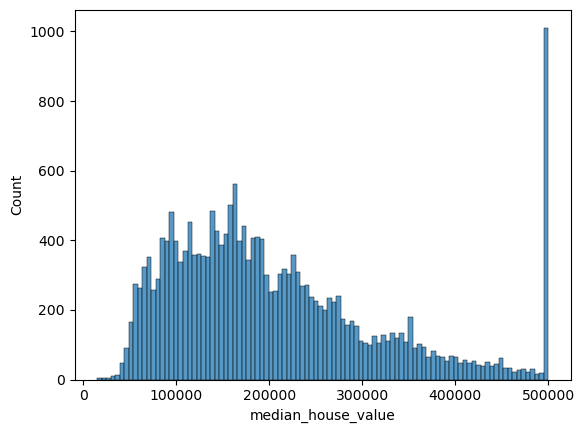

In [5]:
sns.histplot(df.median_house_value, bins=100)

In [6]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [7]:
df=df.drop('ocean_proximity',axis=1)

In [8]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

**Features with null values**

In [9]:
a=df.isnull().sum()
a

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [10]:
med= df['population'].median()
med

1166.0

# Split the data set

Firstly shuffle the  data to avoid biasing

In [11]:
n = len(df)

idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

Then Split the data

In [12]:
val = int(n * 0.2) # Validation data 20 %
test = int(n * 0.2)
train = n - val - test

In [13]:
df_train = df.iloc[idx[:train]]
df_val = df.iloc[idx[train:train+val]]
df_test = df.iloc[idx[train+val:]]

In [14]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

**Log transformation to median_house_value**

In [15]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

**Drop the target value from the dataframe**

In [16]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [17]:
df_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250


**fill Missing values**

In [18]:
df_train_0=df_train.copy(deep=True)
df_train_mean=df_train.copy(deep=True)

In [19]:
df_train_0['total_bedrooms'] = df_train_0['total_bedrooms'].fillna(value=0,inplace=False)

In [20]:
mean_tbd= df['total_bedrooms'].mean()
df_train_mean['total_bedrooms'] = df_train_mean['total_bedrooms'].fillna(value=mean_tbd,inplace=False)

In [21]:
df_train_0.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,0.0,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,0.0,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,0.0,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,0.0,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,0.0,1063.0,428.0,3.7250


In [22]:
df_train_mean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-119.01,36.06,25.0,1505.0,537.870553,1392.0,359.0,1.6812
1,-119.46,35.14,30.0,2943.0,537.870553,1565.0,584.0,2.5313
2,-122.44,37.80,52.0,3830.0,537.870553,1310.0,963.0,3.4801
3,-118.72,34.28,17.0,3051.0,537.870553,1705.0,495.0,5.7376
4,-121.93,36.62,34.0,2351.0,537.870553,1063.0,428.0,3.7250


#  Build a linear regression model

**Define a function that return np array of the dataframe**

In [23]:
def prepare_X(df):
    return df.values

**Define a function that take array of features and labels as an argument and return weights**

In [24]:
def train_linear_regression (X,y,r=0.0):
    ones = np.ones(X.shape[0]) # return a column with ones 
    X=np.column_stack([ones,X])
    
    XTX = X.T.dot(X) # Transpose X Mutiplied by X
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg
    XTX_inv = np.linalg.inv(XTX) # inverse of XTX
    w= XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

**Define a function that calculate rmse**

In [60]:
def rmse(a,b):
    er=a - b
    mse = (er**2).mean()
    return np.sqrt(mse)

In [61]:
X_Train_0 = prepare_X(df_train_0)
w_0,w = train_linear_regression(X_Train_0,y_train) 

**Now lets see how this model perform "Calculate y_pred"**

In [62]:
y_pred_0= w_0 + X_Train_0.dot(w)

**Now lets compare between true_y and pred_y**

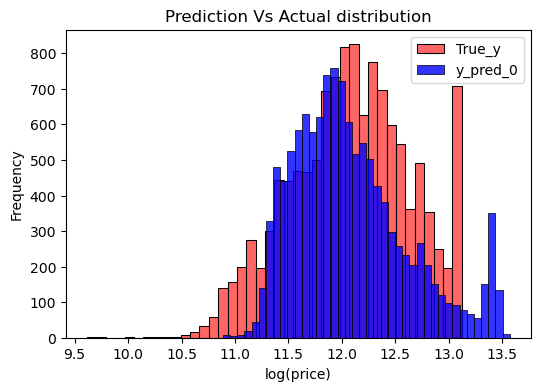

In [63]:
plt.figure(figsize=(6,4))

sns.histplot(y_train, label= "True_y", color= 'r', alpha=0.6, bins=40)
sns.histplot(y_pred_0, label= "y_pred_0", color= 'b', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel ('log(price)')
plt.title ("Prediction Vs Actual distribution")

plt.show()

In [64]:
e1 = rmse(y_train,y_pred_0)
e1 = round (e1,2)
e1

0.16

In [65]:
X_Train_mean = prepare_X(df_train_mean)
w_0,w = train_linear_regression(X_Train_mean,y_train) 

**Now lets see how this model perform "Calculate y_pred"**

In [66]:
y_pred_mean= w_0 + X_Train_mean.dot(w)

**Now lets compare between true_y and pred_y**

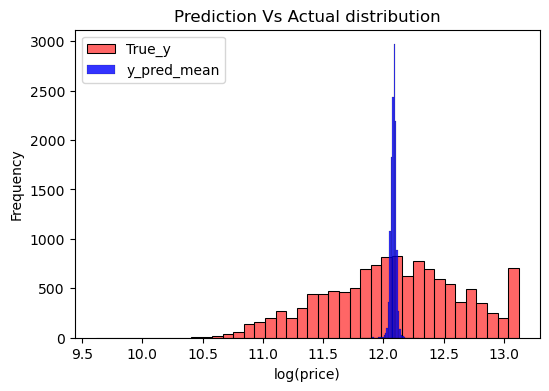

In [67]:
plt.figure(figsize=(6,4))

sns.histplot(y_train, label= "True_y", color= 'r', alpha=0.6, bins=40)
sns.histplot(y_pred_mean, label= "y_pred_mean", color= 'b', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel ('log(price)')
plt.title ("Prediction Vs Actual distribution")

plt.show()

In [68]:
e1 = rmse(y_train,y_pred_mean)
e1 = round (e1,2)
e1

0.57

**Initiate list of r values "regularization"**

In [69]:
r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10 ]

In [70]:
for r in r_list:
    w_0, w = train_linear_regression(X_Train_0, y_train, r)
    y_pred_0= w_0 + X_Train_0.dot(w)
    e = round ( rmse(y_train,y_pred_0),2)
    print (r, e)

0 0.16
1e-06 0.16
0.0001 0.16
0.001 0.16
0.01 0.16
0.1 0.16
1 0.16
5 0.17
10 0.17


# Try the impact of shuffling change

In [71]:
seeds=[0,1,2,3,4,5,6,7,8,9]

for s in seeds: 
           
        n = len(df)
    
        val = int(n * 0.2) # Validation data 20 %
        test = int(n * 0.2)
        train = n - val - test
    
        idx = np.arange(n)
        np.random.seed(s)
        np.random.shuffle(idx)
    
    
        df_train = df.iloc[idx[:train]]
        df_val   = df.iloc[idx[train:train+val]]
        df_test  = df.iloc[idx[train+val:]]
    
      
        df_train = df_train.reset_index(drop=True)
        df_val = df_val.reset_index(drop=True)
        df_test = df_test.reset_index(drop=True)
    
    
        y_train = np.log1p(df_train.median_house_value.values)
        y_val = np.log1p(df_val.median_house_value.values)
        y_test = np.log1p(df_test.median_house_value.values)
    
    
        df_train_0=df_train.copy(deep=True)
    
        df_train_0['total_bedrooms'] = df_train_0['total_bedrooms'].fillna(value=0,inplace=False)
    
        X_Train_0 = prepare_X(df_train_0)
        w_0,w = train_linear_regression(X_Train_0,y_train) 
    
    
        y_pred_0= w_0 + X_Train_0.dot(w)
    
    
    
        e = round (rmse(y_train,y_pred_0),2)
       
        print(s,e)

0 0.17
1 0.17
2 0.17
3 0.16
4 0.17
5 0.17
6 0.17
7 0.16
8 0.16
9 0.16


**Define a function that take a dataframe and list  to give a standard deviation of rmse**

In [77]:
def stds_model_errors(df,seeds):
    
    errors = [] 
    for s in seeds: 

        n = len(df)
    
        val = int(n * 0.2) # Validation data 20 %
        test = int(n * 0.2)
        train = n - val - test
    
        idx = np.arange(n)
        np.random.seed(s)
        np.random.shuffle(idx)
    
    
        df_train = df.iloc[idx[:train]]
        df_val   = df.iloc[idx[train:train+val]]
        df_test  = df.iloc[idx[train+val:]]
    
      
        df_train = df_train.reset_index(drop=True)
        df_val = df_val.reset_index(drop=True)
        df_test = df_test.reset_index(drop=True)
    
    
        y_train = np.log1p(df_train.median_house_value.values)
        y_val = np.log1p(df_val.median_house_value.values)
        y_test = np.log1p(df_test.median_house_value.values)
    
    
        df_train_0=df_train.copy(deep=True)
    
        df_train_0['total_bedrooms'] = df_train_0['total_bedrooms'].fillna(value=0,inplace=False)
    
        X_Train_0 = prepare_X(df_train_0)
        w_0,w = train_linear_regression(X_Train_0,y_train) 
    
    
        y_pred_0= w_0 + X_Train_0.dot(w)
    
       
        e = round (rmse(y_train,y_pred_0),2)
         
        errors.append(e)
        
    print (round (np.std(errors),3))       

In [78]:
stds_model_errors(df,seeds)

0.005


In [80]:
n = len(df)
test = int(n * 0.2)
train = n -  test

idx = np.arange(n)
np.random.seed(9)
np.random.shuffle(idx)
    
    
df_train = df.iloc[idx[:train]]
    
df_test  = df.iloc[idx[train:]]
    
    
df_train = df_train.reset_index(drop=True)
     
df_test = df_test.reset_index(drop=True)
    
    
y_train = np.log1p(df_train.median_house_value.values)
     
y_test = np.log1p(df_test.median_house_value.values)
    
    
df_train_0=df_train.copy(deep=True)
    
df_train_0['total_bedrooms'] = df_train_0['total_bedrooms'].fillna(value=0,inplace=False)
    
X_Train_0 = prepare_X(df_train_0)
w_0,w = train_linear_regression(X_Train_0,y_train,r=0.001) 
    
    
y_pred_0= w_0 + X_Train_0.dot(w)
    
      
e = round (rmse(y_train,y_pred_0),2)
e

0.16